In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Import the data
eurusd = pd.read_parquet("4H_EURUSD.parquet")
eurusd["time"] = pd.to_datetime(eurusd["time"])
eurusd = eurusd.set_index("time")
df = eurusd[["close"]]

df

,close
time,
2020-01-02 00:00:00,1.12209
2020-01-02 04:00:00,1.12043
2020-01-02 08:00:00,1.12028
2020-01-02 12:00:00,1.11962
2020-01-02 16:00:00,1.11697
...,...
2024-06-28 04:00:00,1.06863
2024-06-28 08:00:00,1.06975
2024-06-28 12:00:00,1.07044


In [15]:
from sklearn.linear_model import LinearRegression

# Function to calculate the slope of the linear regression
def linear_regression_slope(series):
    X = np.arange(len(series)).reshape(-1, 1)  # Create an array of indices for X
    y = series.values.reshape(-1, 1)  # Use the values of the series as y
    model = LinearRegression().fit(X, y)  # Fit the linear regression model
    slope = model.coef_[0][0]  # Extract the slope from the model
    return slope

df['linear_slope_6M'] = df["close"].rolling(125*6).apply(linear_regression_slope)
df['linear_slope_3M'] = df["close"].rolling(60*6).apply(linear_regression_slope)
df['linear_slope_1M'] = df["close"].rolling(20*6).apply(linear_regression_slope)

/var/folders/lp/js1h148s3d3fw94k4v01t35h0000gn/T/ipykernel_78253/592388392.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['linear_slope_6M'] = df["close"].rolling(125*6).apply(linear_regression_slope)
/var/folders/lp/js1h148s3d3fw94k4v01t35h0000gn/T/ipykernel_78253/592388392.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['linear_slope_3M'] = df["close"].rolling(60*6).apply(linear_regression_slope)
/var/folders/lp/js1h148s3d3fw94k4v01t35h0000gn/T/ipykernel_78253/592388392.py:13: SettingWith

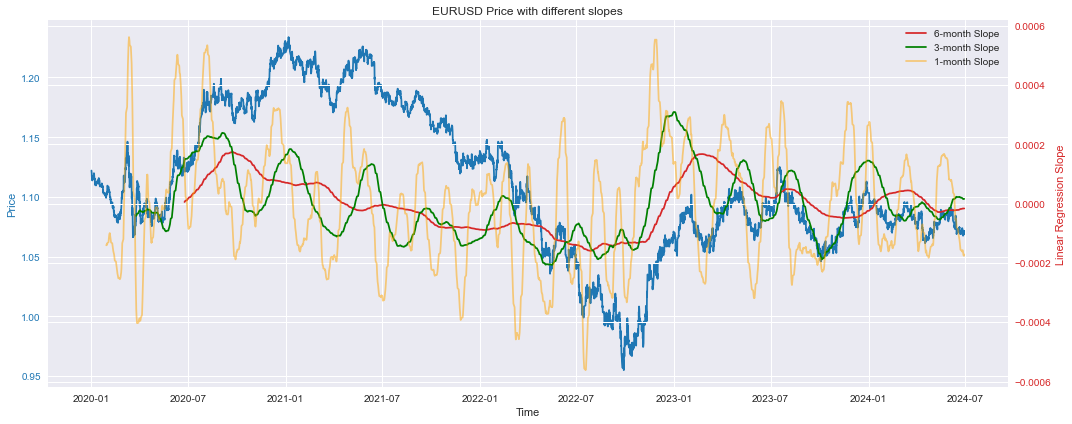

In [21]:
plt.style.use('seaborn')
# Create figure and axes
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot of first data series (Price)
color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('Price', color=color)
ax1.plot(df['close'], color=color, label='Close Price')
ax1.tick_params(axis='y', labelcolor=color)

# Creation of the second axis for the LR slopes
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Linear Regression Slope', color=color)
ax2.plot(df['linear_slope_6M'], color=color, label='6-month Slope')
ax2.plot(df['linear_slope_3M'], color="green", label='3-month Slope')
ax2.plot(df['linear_slope_1M'], color="orange", label='1-month Slope', alpha=0.50)
ax2.tick_params(axis='y', labelcolor=color)


# Add title and display caption
plt.title('EURUSD Price with different slopes')
fig.tight_layout()
plt.legend()

# Graph display
plt.show()